<a href="https://colab.research.google.com/github/brindhasenthilkumar/fmml2021/blob/main/Mod5_Lab1_fmml20210502.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 5 Lab 1

# Non Linear Support Vector Machines

```
Module Coordinator : Bhuvanesh Sridharan
```



In [19]:
#Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


The topic of classifier in today's lab, SVMs make for really good linear separators. Let us look at an example which has linearly separable data:

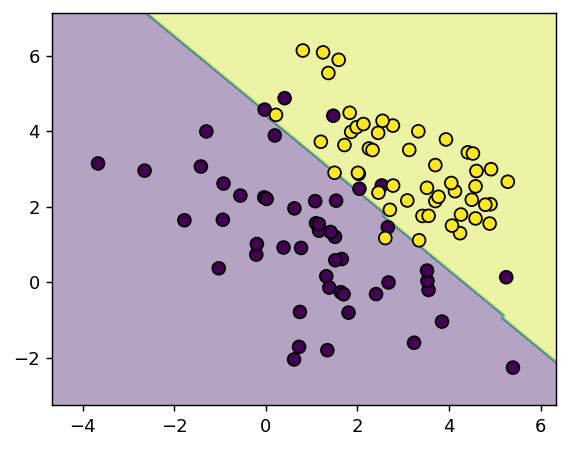

In [3]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)

  plt.show()

boundaryExp()

# The Kernel Trick

The true potential of SVMs is unleashed when they are combined with kernels.

## Kernels : An intuitive explanation

Kernel methods are essentially counting on using the training data (say $i^{th}$ example $(x_i, y_i)$ ) itself in a more straightforward way and learning a corresponding weight ($w_i$) for that example. Rather than trying to learn a fixed set of parameters which is done typically.
Depending on the kind of kernel used, we can virtually project the training data in a higher dimension to make it easier for the classifier to classify them.


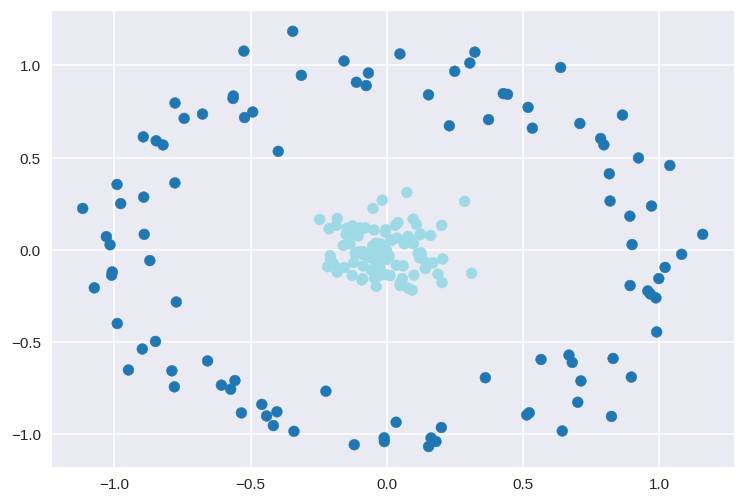

In [5]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.style.use("seaborn")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)

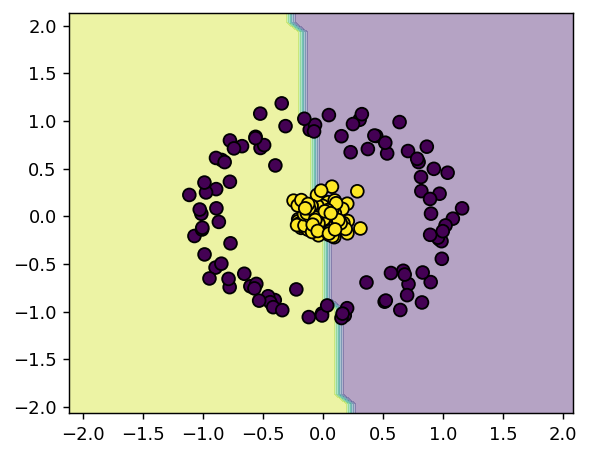

In [6]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

However, if we artificially add another dimention to the dataset of the form:

$z = x^2 + y^2$
we can clearly see a hyperplane that can distinguish both the datasets:

In [7]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [8]:
X_new = np.hstack((X, Z))

In [9]:
import plotly.graph_objects as go


In [10]:
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

That simple trick has helped us to get another dimension in which the data is linearly separable by a hyperplane (in this case, a 2d plane)

---

Now let us use the rbf kernel and use an SVM Classifier.

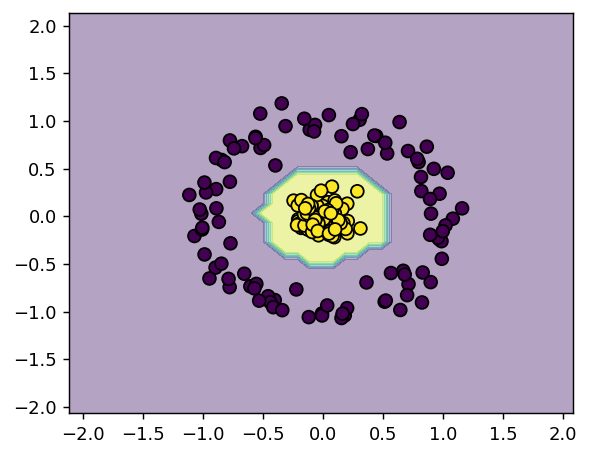

In [11]:
plt.style.use("default")
clf = svm.SVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

Now let us get back to our original dataset of iris and see if this kernel trick has helped us:

Accuracy of the SVM on the test set: 

0.974


The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


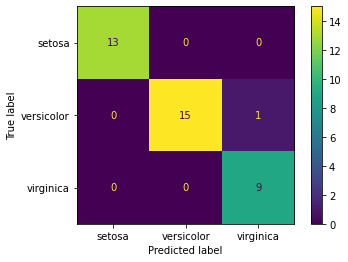

In [4]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the SVM on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))
class_names = iris["target_names"]
print("The confusion matrix is : ")
plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names)

Accuracy of the Linear SVM on the test set: 

0.974


The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



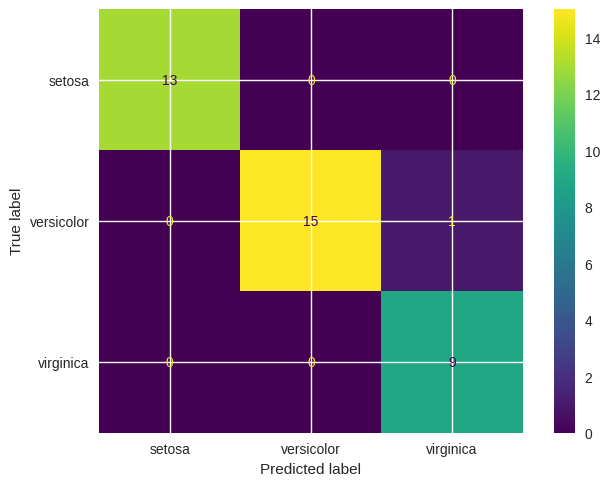

In [16]:
clf1 = svm.SVC(kernel='linear')
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print("Accuracy of the Linear SVM on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))
class_names = iris["target_names"]
print("The confusion matrix is : ")
plot_confusion_matrix(clf1, X_test, y_test, display_labels=class_names)

Accuracy of the polynomial SVM on the test set: 

0.974


The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



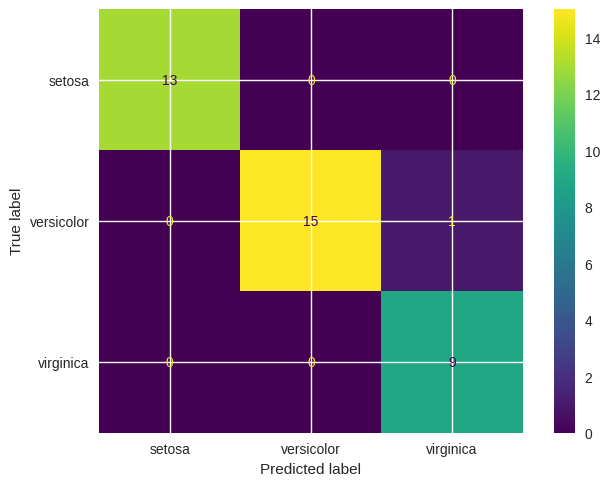

In [17]:
clf2 = svm.SVC(kernel='poly')
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
print("Accuracy of the polynomial SVM on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))
class_names = iris["target_names"]
print("The confusion matrix is : ")
plot_confusion_matrix(clf2, X_test, y_test, display_labels=class_names)

Accuracy of the RBF SVM on the test set: 

0.974


The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



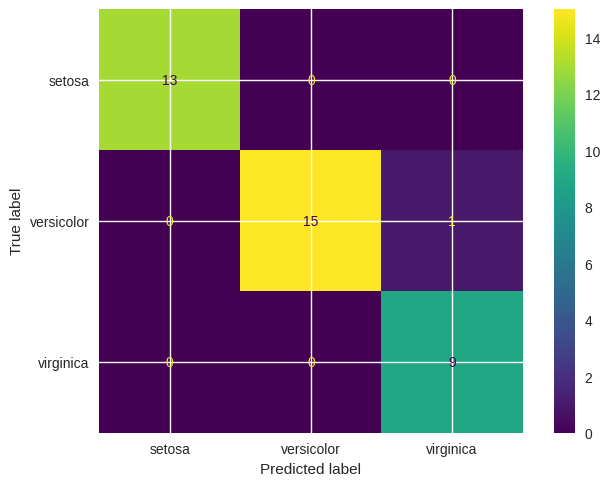

In [19]:
clf3 = svm.SVC(kernel='rbf')
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
print("Accuracy of the RBF SVM on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))
class_names = iris["target_names"]
print("The confusion matrix is : ")
plot_confusion_matrix(clf3, X_test, y_test, display_labels=class_names)

Accuracy of the Sigmoid SVM on the test set: 

0.237


The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



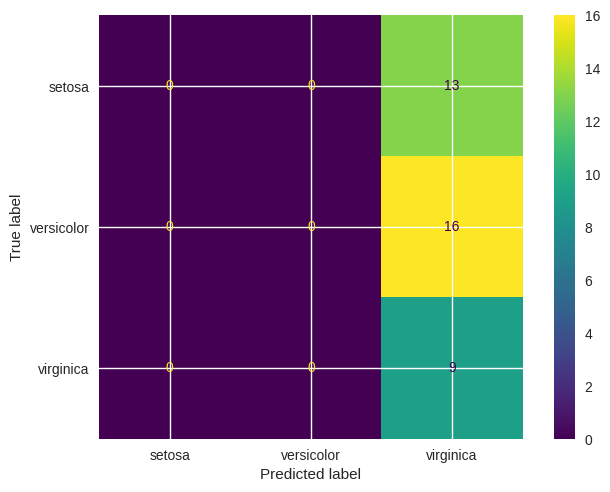

In [20]:
clf4 = svm.SVC(kernel='sigmoid')
clf4.fit(X_train, y_train)
y_pred = clf4.predict(X_test)
print("Accuracy of the Sigmoid SVM on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))
class_names = iris["target_names"]
print("The confusion matrix is : ")
plot_confusion_matrix(clf4, X_test, y_test, display_labels=class_names)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, random_state = 0)
clf5 = svm.SVC(kernel='precomputed')
X_train = np.dot(X_train, X_train.T)
clf5.fit(X_train, y_train)


SVC(kernel='precomputed')

Accuracy of the Precomputed SVM on the test set: 

0.320


The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


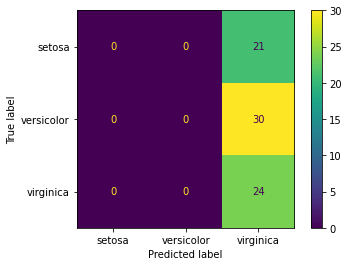

In [18]:
X_test = np.dot(X_test, X_train.T)
y_pred = clf5.predict(X_test)
print("Accuracy of the Precomputed SVM on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))
class_names = iris["target_names"]
print("The confusion matrix is : ")
plot_confusion_matrix(clf5, X_test, y_test, display_labels=class_names)

In [133]:
iris = load_iris()
X, y = iris.data, iris.target
X, testx, y, testy = train_test_split(X[:, 0:2], y, train_size = 0.7, random_state = 0)

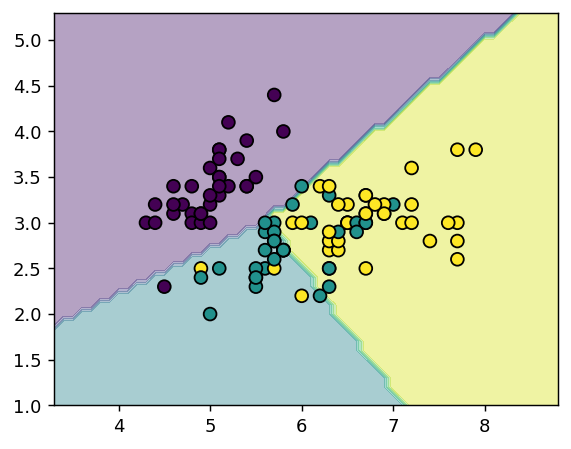

Accuracy of the Linear SVM on the test set with first two features: 

0.689

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


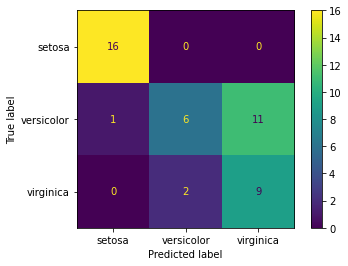

In [80]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC(max_iter=10000)
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the Linear SVM on the test set with first two features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

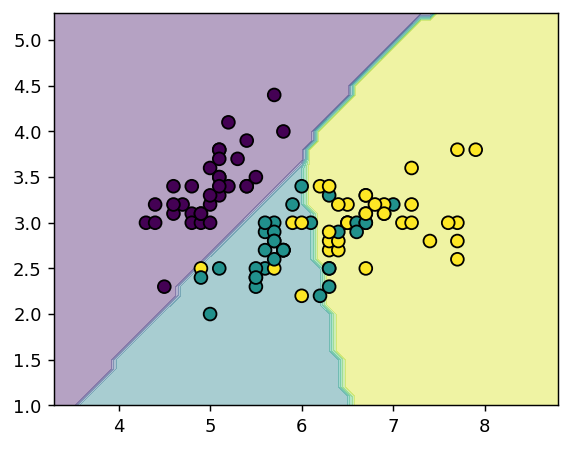

Accuracy of the RBF SVM on the test set with first two features: 

0.800

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


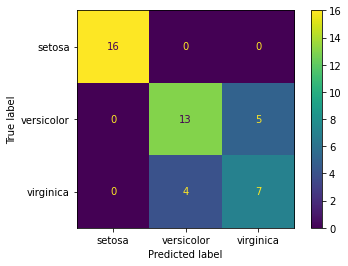

In [115]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.SVC(kernel='rbf')
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the RBF SVM on the test set with first two features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

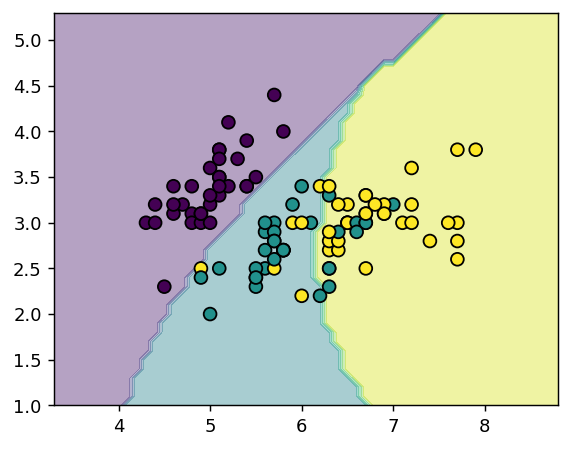

Accuracy of the Polynomial SVM on the test set with first two features: 

0.800

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


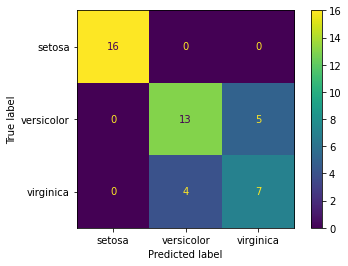

In [116]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.SVC(kernel='poly')
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the Polynomial SVM on the test set with first two features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

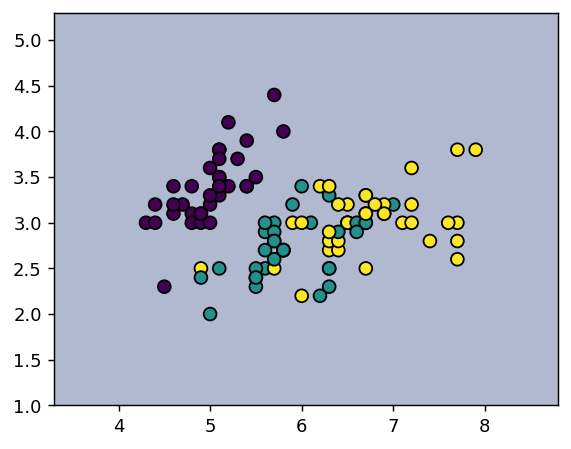

Accuracy of the Sigmoid SVM on the test set with first two features: 

0.244

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


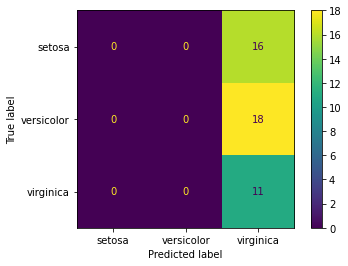

In [134]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.SVC(kernel='sigmoid')
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the Sigmoid SVM on the test set with first two features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

In [135]:
iris = load_iris()
X, y = iris.data, iris.target
X, testx, y, testy = train_test_split(X[:, 2:4], y, train_size = 0.7, random_state = 0)

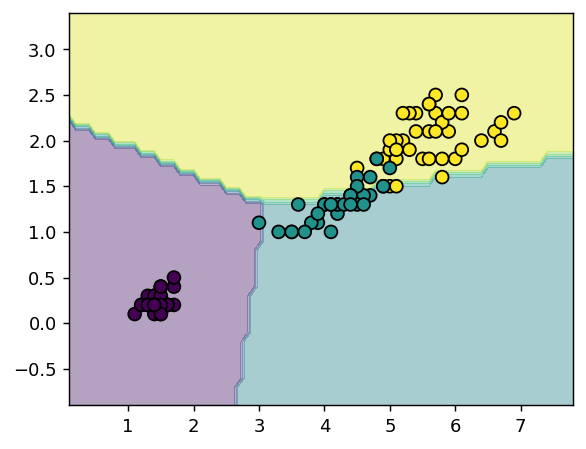

Accuracy of the Linear SVM on the test set with third and fourth features: 

0.778

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


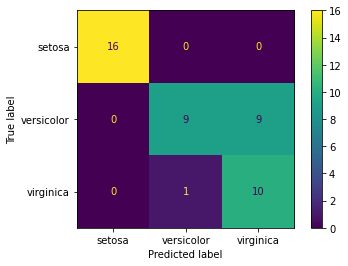

In [93]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC(max_iter=10000)
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the Linear SVM on the test set with third and fourth features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

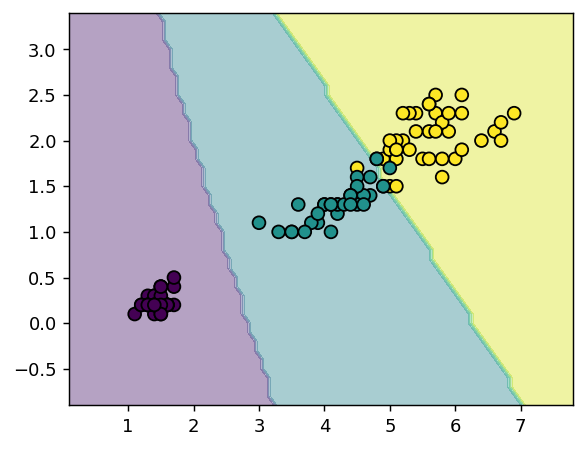

Accuracy of the RBF SVM on the test set with third and fourth features: 

0.978

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


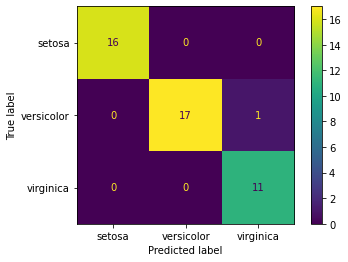

In [118]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.SVC(kernel='rbf')
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the RBF SVM on the test set with third and fourth features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

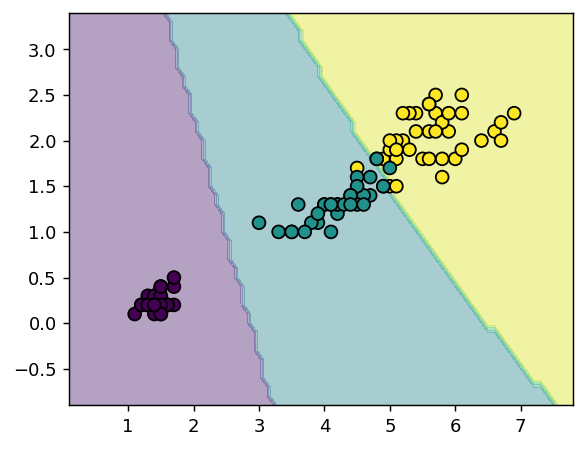

Accuracy of the Polynomial SVM on the test set with third and fourth features: 

0.978

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


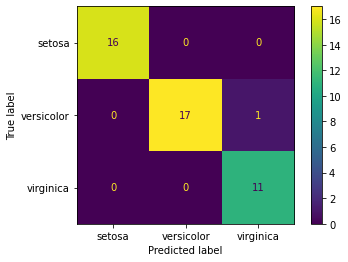

In [121]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.SVC(kernel='poly')
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the Polynomial SVM on the test set with third and fourth features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

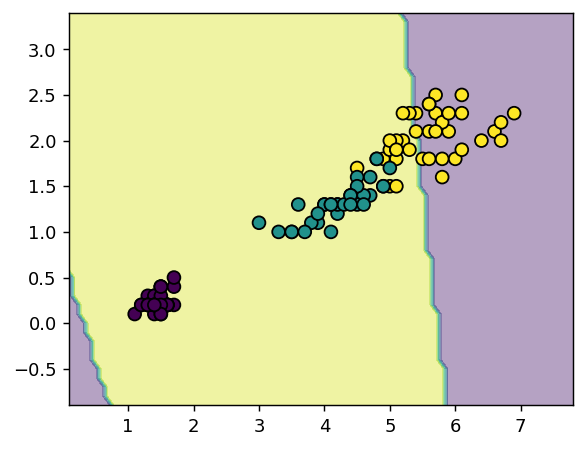

Accuracy of the Sigmoid SVM on the test set with third and fourth features: 

0.111

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


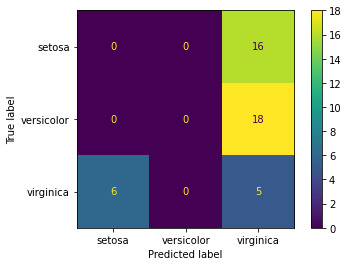

In [136]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.SVC(kernel='sigmoid')
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the Sigmoid SVM on the test set with third and fourth features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

In [137]:
iris = load_iris()
X, y = iris.data, iris.target
X, testx, y, testy = train_test_split(X[:, 1:3], y, train_size = 0.7, random_state = 0)

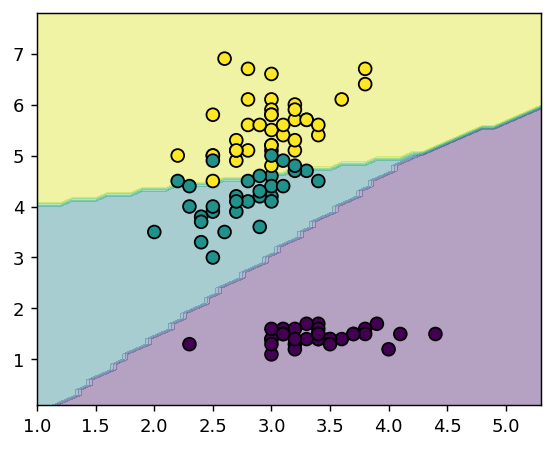

Accuracy of the Linear SVM on the test set with second and third features: 

0.867

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


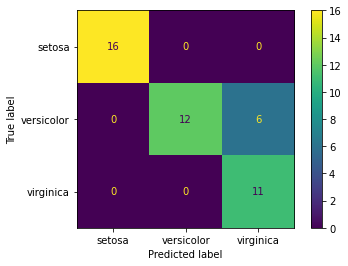

In [95]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC(max_iter=10000)
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the Linear SVM on the test set with second and third features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

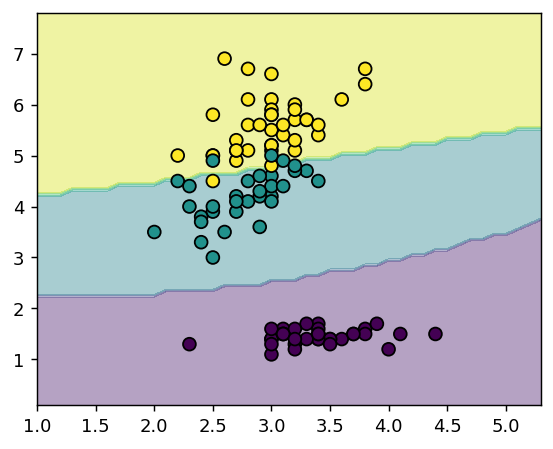

Accuracy of the RBF SVM on the test set with second and third features: 

0.956

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


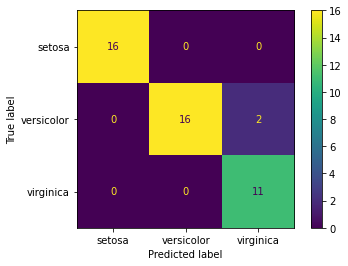

In [123]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.SVC(kernel='rbf')
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the RBF SVM on the test set with second and third features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

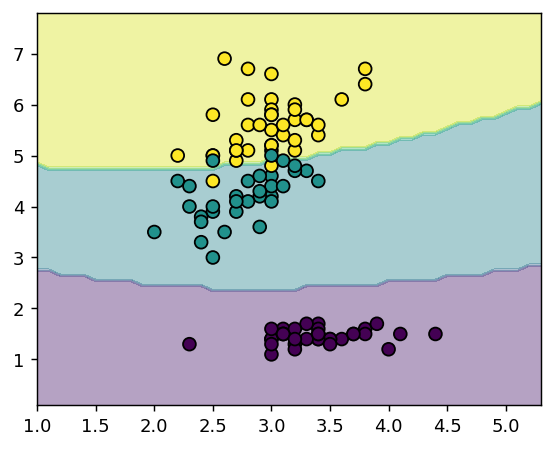

Accuracy of the Polynomial SVM on the test set with second and third features: 

0.933

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


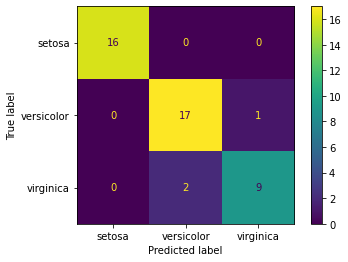

In [124]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.SVC(kernel='poly')
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the Polynomial SVM on the test set with second and third features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

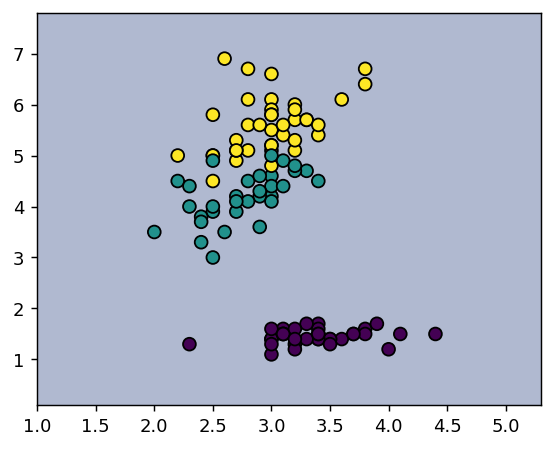

Accuracy of the Sigmoid SVM on the test set with second and third features: 

0.244

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


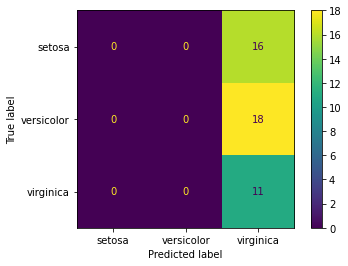

In [138]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.SVC(kernel='sigmoid')
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the Sigmoid SVM on the test set with second and third features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

In [139]:
iris = load_iris()
X, y = iris.data, iris.target
X, testx, y, testy = train_test_split(X[:, [0, 3]], y, train_size = 0.7, random_state = 0)

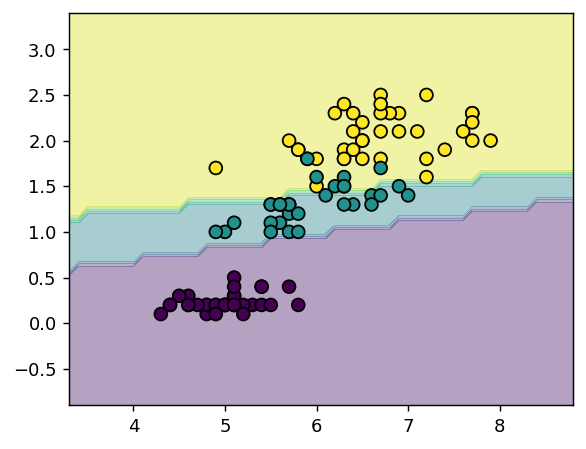

Accuracy of the Linear SVM on the test set with first and fourth features: 

0.800

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


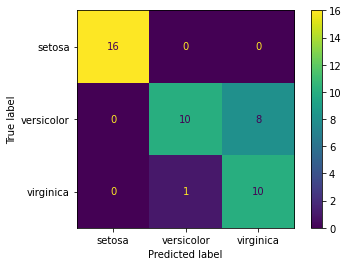

In [99]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC(max_iter=10000)
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the Linear SVM on the test set with first and fourth features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

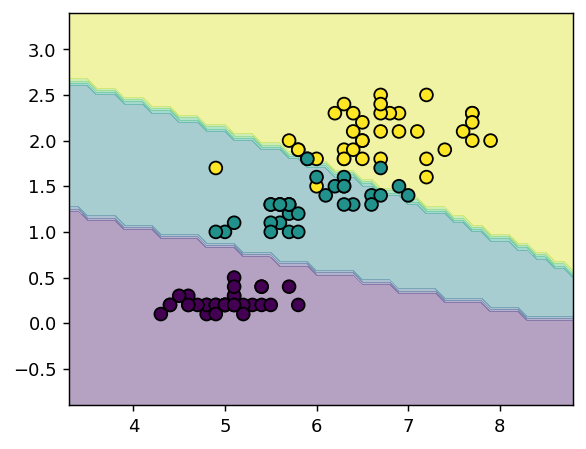

Accuracy of the RBF SVM on the test set with first and fourth features: 

0.956

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


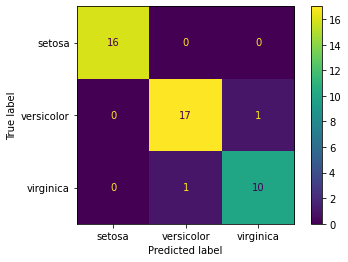

In [126]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.SVC(kernel='rbf')
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the RBF SVM on the test set with first and fourth features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

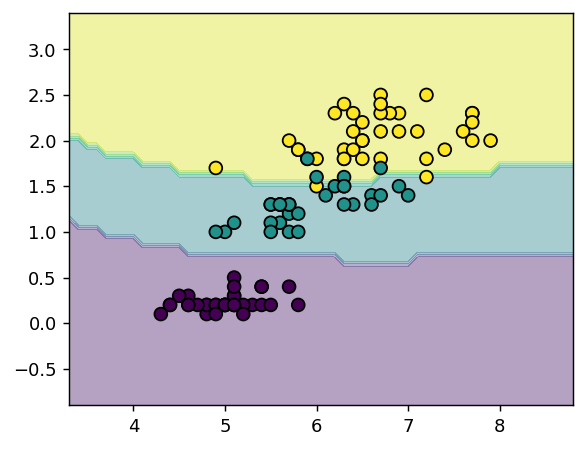

Accuracy of the Polynomial SVM on the test set with first and fourth features: 

0.956

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


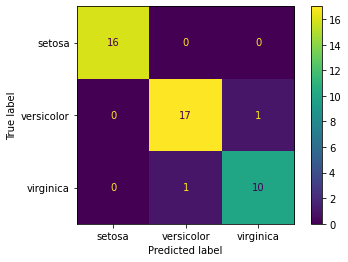

In [127]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.SVC(kernel='poly')
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the Polynomial SVM on the test set with first and fourth features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

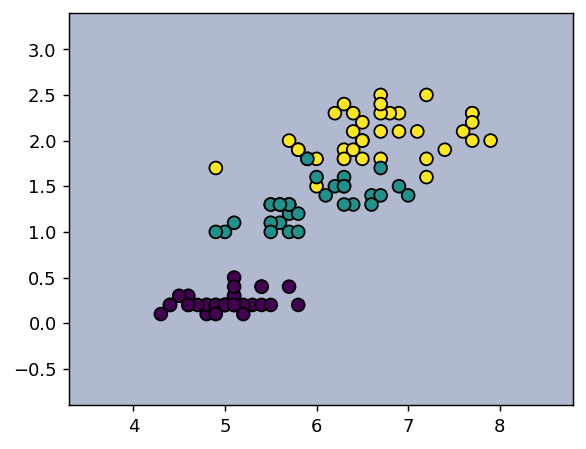

Accuracy of the Sigmoid SVM on the test set with first and fourth features: 

0.244

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


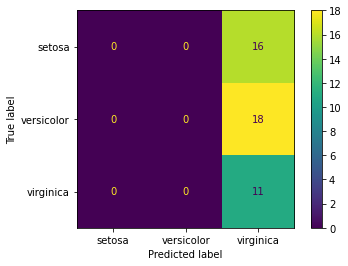

In [140]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.SVC(kernel='sigmoid')
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the Sigmoid SVM on the test set with first and fourth features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

In [141]:
iris = load_iris()
X, y = iris.data, iris.target
X, testx, y, testy = train_test_split(X[:, [0, 2]], y, train_size = 0.7, random_state = 0)

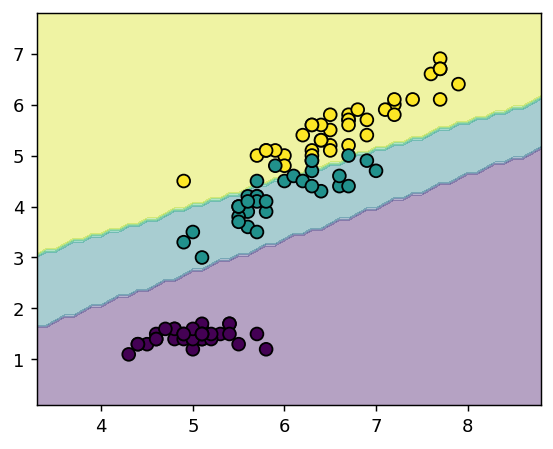

Accuracy of the Linear SVM on the test set with first and third features: 

0.867

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


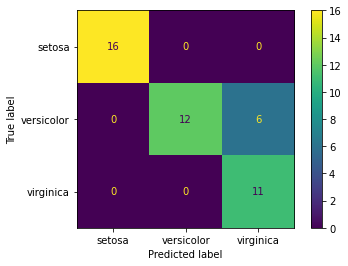

In [104]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC(max_iter=10000)

  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the Linear SVM on the test set with first and third features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

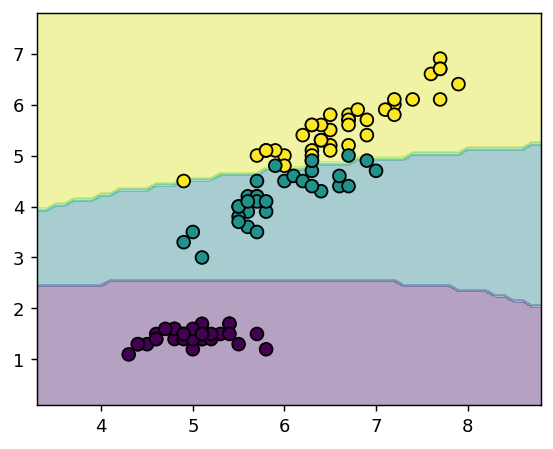

Accuracy of the RBF SVM on the test set with first and third features: 

0.978

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


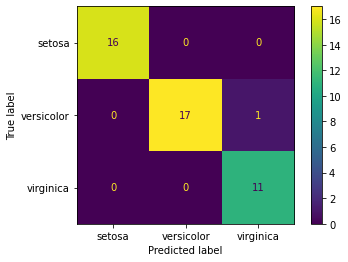

In [129]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.SVC(kernel='rbf')
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the RBF SVM on the test set with first and third features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

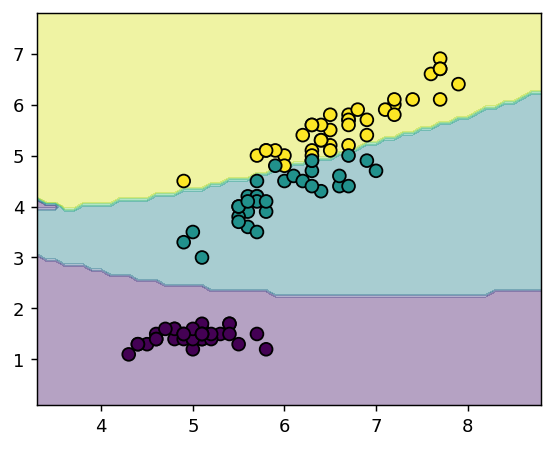

Accuracy of the Polynomial SVM on the test set with first and third features: 

0.933

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


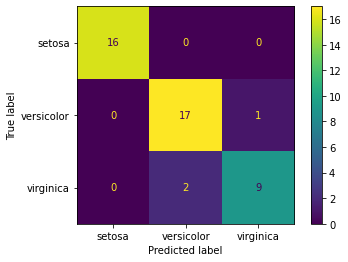

In [130]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.SVC(kernel='poly')
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the Polynomial SVM on the test set with first and third features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

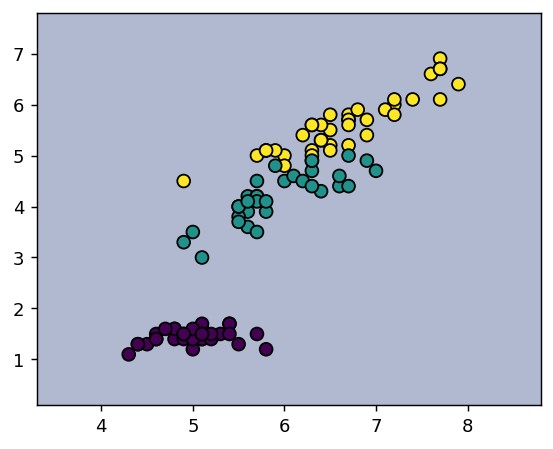

Accuracy of the Sigmoid SVM on the test set with first and third features: 

0.244

The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


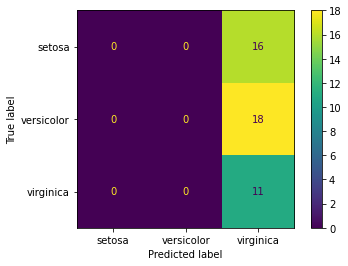

In [142]:
def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.SVC(kernel='sigmoid')
  pair = [0, 1]
  clf.fit(X[:, pair], y)


  plotDecisionBoundary(X, y, pair, clf)

  y_pred = clf.predict(testx)
  print("Accuracy of the Sigmoid SVM on the test set with first and third features: \n\n{:.3f}\n".format(accuracy_score(y_pred, testy)))
  class_names = iris["target_names"]
  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, testx, testy, display_labels=class_names)
  plt.show()

boundaryExp()

From the above:
First and Second features & first and third feature gave an accuracy of 87% using Linear SVM


first and fourth features accuracy was 97% & with third and fourth features accuracy was 98% using Polynomial SVM 


Finally in RBF kernal first and third features & thrid and fourth features - gave highest accuacy of 98%

From the above, we can say features 3 and 4 are the key features to classify the IRIS dataset in an appropriate way with very less error and high accuacy 



The sigmoid SVM gave a very unsatisfactory performance with all pairs of feature combinations

Certainly, using a kernel has increased our accuracy on the iris dataset.

Things to try out:
- Try to run the same experiment after filtering different features, 2 at a time.
- Using different kinds of kernels for the SVM among: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}